# Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics.pairwise import cosine_similarity

## Gram_schmidt process

$\large \displaystyle \mathrm{V} = \begin{pmatrix} \mathbf{v}_1 &\mathbf{v}_2 & \cdots & \mathbf{v}_p \end{pmatrix}$
, where  $\mathbf{v}_i$ for $i \in \{1,2,\dots,p\}$ are column vectors.

$\large \begin{align}  \mathbf{u}_1 &= \mathbf{v}_1 \\ \mathbf{u}_2 &= \mathbf{v}_2 - \frac{\left\langle \mathbf{u}_1, \mathbf{v}_2 \right\rangle}{\left\langle \mathbf{u}_1, \mathbf{u}_1 \right\rangle} \mathbf{u}_1\\ \mathbf{u}_3 &= \mathbf{v}_3- \frac{\left\langle \mathbf{u}_2, \mathbf{v}_3 \right\rangle}{\left\langle \mathbf{u}_2, \mathbf{u}_2\right\rangle} \mathbf{u}_2 - \frac{\left\langle \mathbf{u}_1, \mathbf{v}_3 \right\rangle}{\left\langle \mathbf{u}_1, \mathbf{u}_1\right\rangle} \mathbf{u}_1\\ &\ \vdots \nonumber \\\mathbf{u}_p &= \mathbf{v}_p - \sum^{p-1}_{i=1} \frac{\langle \mathbf{u}_i, \mathbf{v}_p \rangle}{\left\langle \mathbf{u}_i, \mathbf{u}_i\right\rangle} \mathbf{u}_i\\
\end{align} $

The orthogonal column vectors matrix is

$\large \therefore \mathrm{U} = \begin{pmatrix} \mathbf{u}_1 & \mathbf{u}_2 &\cdots & \mathbf{u}_p \end{pmatrix}$

In [3]:
class gram_schmidt:
    '''def __init__(self, X):
        self.X = X.astype(float)'''
        
    def _proj(self, u, v):
        return (np.vdot(v, u) / np.vdot(u,u))*u
    
    def fit_transform(self, X, col_vec = True, normal = True):
        X = X.astype(float)
        if col_vec:
            mat = X.copy()
        else:
            mat = (X.T).copy()
        
        N = mat.shape[1]
        mat_orth = np.array([]).reshape(mat.shape[0], -1)
        for n in range(N):
            u = mat[:, n:n+1].copy()
            if n ==0:
                mat_orth = np.hstack((mat_orth,u))
            else:
                for i in range(n):
                    u -= self._proj(mat_orth[:, i:i+1], mat[:, n:n+1])
                mat_orth = np.hstack((mat_orth,u))
        
        if normal:
            result = mat_orth / np.linalg.norm(mat_orth, axis=0)
            if col_vec:
                return result
            else:
                return result.T
        else:
            if col_vec:
                return mat_orth
            else:
                return mat_orth.T

# Example

In [4]:
col_vecs = np.array([[2,1], [1,2]])

In [5]:
gs= gram_schmidt()
col_vecs_orthonorm = gs.fit_transform(col_vecs)

In [28]:
x = np.arange(-1,1,.00001)

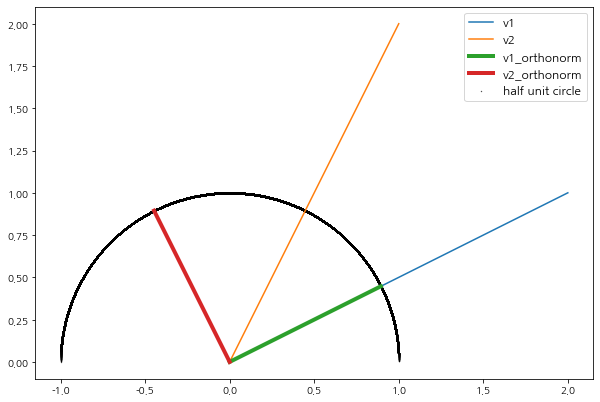

In [32]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.set_aspect(1)
ax.plot(np.vstack(([0,0], col_vecs[:,0]))[:,0], np.vstack(([0,0], col_vecs[:,0]))[:,1],  label='v1')
ax.plot(np.vstack(([0,0], col_vecs[:,1]))[:,0], np.vstack(([0,0], col_vecs[:,1]))[:,1], label='v2')
ax.scatter(x, np.sqrt(1-x**2), s=.1, color='k', label='half unit circle')

ax.plot(np.vstack(([0,0], col_vecs_orthonorm[:,0]))[:,0], np.vstack(([0,0], col_vecs_orthonorm[:,0]))[:,1], label='v1_orthonorm', linewidth = 4)
ax.plot(np.vstack(([0,0], col_vecs_orthonorm[:,1]))[:,0], np.vstack(([0,0], col_vecs_orthonorm[:,1]))[:,1], label='v2_orthonorm', linewidth = 4)
plt.legend(fontsize=12)
plt.show()